### Load JSON data

In [7]:
%matplotlib inline

import json
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint as pp

with open('../sample.json') as json_file:
    json_data = json.load(json_file)
    

### Split the code into strokes

In [8]:
strokes = [];
for i in range(0, len(json_data["data"])):
    strokes.append(json_data["data"][i])

print "Number of strokes: {}".format(len(strokes))

Number of strokes: 7


### Select the stroke

In [9]:
first_stroke = strokes[2]

print "Calculating the min & max values..."

max_x = 0.0;
min_x = 100000.0;
max_y = 0.0;
min_y = 100000.0
for point in first_stroke:
    if point["x"] > max_x:
        max_x = point["x"]
    if point["x"] < min_x:
        min_x = point["x"]
    if point["y"] > max_y:
        max_y = point["y"]
    if point["y"] < min_y:
        min_y = point["y"]

print "MAX X: {}".format(max_x)
print "MIN X: {}".format(min_x)
print "MAX Y: {}".format(max_y)
print "MIN Y: {}".format(min_y)

width = max_x - min_x
height = max_y - min_y
area = width * height

print "length: {}".format(width)
print "height: {}".format(height)
print "area: {}".format(area)

x_coords = []
y_coords = []
# This is correct:
for point in first_stroke:
    x_coords.append(point["x"] - min_x)
    y_coords.append(point["y"] - min_y)
    

#This is temporary:
# for point in first_stroke:
#     y_coords.append(-point["x"] - min_x)
#     x_coords.append(point["y"] - min_y)

Calculating the min & max values...
MAX X: 176.666656494
MIN X: 116.666656494
MAX Y: 413
MIN Y: 339
length: 60.0
height: 74
area: 4440.0


### Round the values to simplify computations

In [10]:
x_coords = np.around(x_coords)
y_coords = np.around(y_coords)

print "x: {0}, len {1}".format(x_coords, len(x_coords))
print "y: {0}, len {1}".format(y_coords, len(y_coords))

x: [  7.   7.   7.   7.  10.  13.  18.  23.  27.  28.  28.  28.  25.  19.  10.
   4.   1.   0.   0.   4.  12.  21.  31.  40.  45.  51.  55.  58.  60.], len 29
y: [ 74.  74.  74.  74.  66.  60.  50.  34.  19.   9.   3.   1.   0.   1.  10.
  17.  26.  34.  42.  49.  54.  56.  56.  56.  55.  53.  51.  49.  47.], len 29


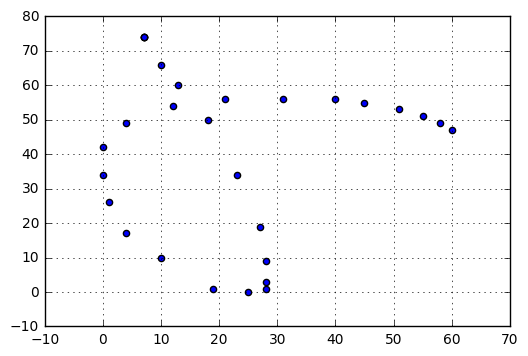

In [11]:
# This is correct:
plt.scatter(x_coords, y_coords)

# This is temporary:
# plt.scatter(x_coords, y_coords)
plt.grid()
plt.show()

### Try to create a vector for validation

In [12]:
vector = np.zeros(int(np.ceil(area)))
proper_width = int(np.ceil(width))
proper_height = int(np.ceil(height))

print "Length of a vector: {0}".format(len(vector))
print "Proper length (x): {0}".format(proper_width)
print "Proper height (y): {0}".format(proper_height)

for index in range(0, len(x_coords)):
    x = int(x_coords[index])
    y = int(y_coords[index])
    
    y_diff = proper_height - 1 if y == 0 else proper_height - y
    y_value = 0 if y_diff == 0 else y_diff * proper_width
    
    position = x + y_value
    
    vector[position] = 1
    print "inserting to position {0}".format(position)
    


Length of a vector: 4440
Proper length (x): 60
Proper height (y): 74
inserting to position 7
inserting to position 7
inserting to position 7
inserting to position 7
inserting to position 490
inserting to position 853
inserting to position 1458
inserting to position 2423
inserting to position 3327
inserting to position 3928
inserting to position 4288
inserting to position 4408
inserting to position 4405
inserting to position 4399
inserting to position 3850
inserting to position 3424
inserting to position 2881
inserting to position 2400
inserting to position 1920
inserting to position 1504
inserting to position 1212
inserting to position 1101
inserting to position 1111
inserting to position 1120
inserting to position 1185
inserting to position 1311
inserting to position 1435
inserting to position 1558
inserting to position 1680


### Try to create a matrix for validation?


In [13]:
matrix = np.zeros((proper_height + 1, proper_width + 1))

for index in range(0, len(x_coords)):
    x = int(x_coords[index])
    y = int(y_coords[index])
    matrix[y][x] = 1
    print "Inserting to matrix[{0}][{1}]".format(y, x)

Inserting to matrix[74][7]
Inserting to matrix[74][7]
Inserting to matrix[74][7]
Inserting to matrix[74][7]
Inserting to matrix[66][10]
Inserting to matrix[60][13]
Inserting to matrix[50][18]
Inserting to matrix[34][23]
Inserting to matrix[19][27]
Inserting to matrix[9][28]
Inserting to matrix[3][28]
Inserting to matrix[1][28]
Inserting to matrix[0][25]
Inserting to matrix[1][19]
Inserting to matrix[10][10]
Inserting to matrix[17][4]
Inserting to matrix[26][1]
Inserting to matrix[34][0]
Inserting to matrix[42][0]
Inserting to matrix[49][4]
Inserting to matrix[54][12]
Inserting to matrix[56][21]
Inserting to matrix[56][31]
Inserting to matrix[56][40]
Inserting to matrix[55][45]
Inserting to matrix[53][51]
Inserting to matrix[51][55]
Inserting to matrix[49][58]
Inserting to matrix[47][60]


### Try to display test example

images(784)
image_size => 784
image_width => 28
image_height => 28


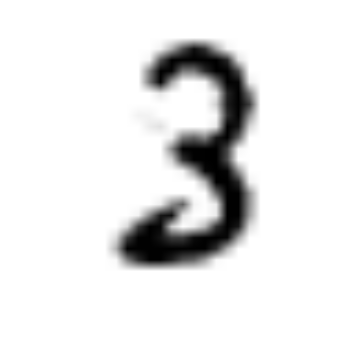

In [14]:
import numpy as np
import matplotlib.cm as cm

test_example = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,80,175,242,205,93,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,171,254,253,253,253,254,214,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,253,249,134,134,212,254,253,182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,253,90,0,0,6,133,253,249,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,0,0,0,20,218,254,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,226,253,193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,12,0,0,0,0,0,5,208,253,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,30,0,0,0,0,20,253,235,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,133,157,122,230,254,159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122,253,253,253,254,187,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,204,253,253,254,178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,104,247,254,250,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,255,254,218,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,145,253,253,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,114,158,12,0,20,253,253,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,121,234,242,28,0,0,20,253,253,97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,194,254,248,49,0,17,68,206,254,231,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,194,253,253,235,196,195,244,253,254,247,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79,254,253,253,253,254,253,253,253,207,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,128,211,253,253,224,175,157,97,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

shape_image = np.multiply(test_example, 1.0 / 255.0)

print('images({0[0]})'.format(shape_image.shape))

image = shape_image.shape[0]

print ('image_size => {0}'.format(image))

image_width = image_height = np.ceil(np.sqrt(image)).astype(np.uint8)

print ('image_width => {0}\nimage_height => {1}'.format(image_width,image_height))


def display(img, image_width, image_height):
    
    # (784) => (28,28)
    one_image = img.reshape(image_width, image_height)
    
    plt.axis('off')
    plt.imshow(one_image, cmap=cm.binary)

# output image     
display(shape_image, image_width, image_height)

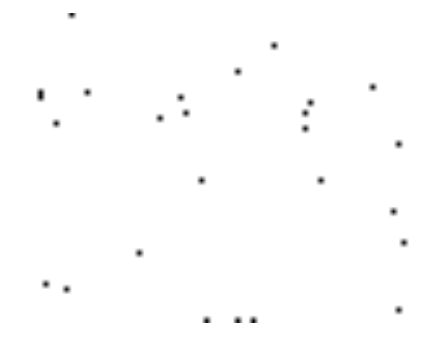

In [15]:
display(vector, proper_width, proper_height)

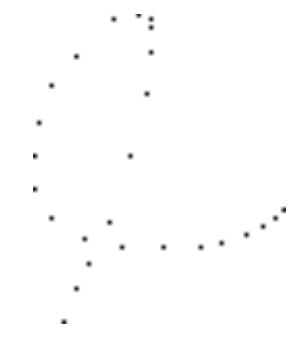

In [16]:
plt.axis('off')
plt.imshow(matrix, cmap=cm.binary)